In [1]:
__author__ = 'Mike Fitzpatrick <fitz@noao.edu>, Glenn Eychaner <geychaner@noao.edu>'
__version__ = '20190103'
__datasets__ = ['sdss_dr14']

### Exploring Public File Services

_Mike Fitzpatrick and Glenn Eychaner_

*Revised:  Jan 03, 2019*

Files in the virtual storage are usually identified via the prefix "_vos://_". This shorthand identifier is resolved to a user's home directory of the storage space in the service.  

If the "_vos://_" prefix is instead the name of another user (e.g. "_geychaner://_", and the remainder of the path grants public or group read/write access, then the other user's spaces will be accessed. Most user spaces have a "_/public_" directory to facilitate file sharing (e.g. '_geychaner://public/foo.fits_' will access the '_foo.fits_' file from user '_geychaner_'). Users can make any file (or directory) public by moving it to (or creating a link in) their "/public" directory.

_Public file services_ are specially created areas where all files are world-readable, and are used for serving files from Data Lab datasets.

We will begin with the **SDSS DR14** public file service as an example.

In [1]:
# Standard DL imports, note we only need storeClient
from dl import storeClient as sc

# 3rd Party Imports
import numpy as np
from matplotlib import pyplot as p
from astropy.io import fits

### Set base directory

In [ ]:
base = 'sdss_dr14://eboss/spectro/redux/v5_10_0/'

### List all available plate/mjd/fiber combinations in the base directory

In [ ]:
print(storeClient.ls (base, format='short'))

### Pick a plate/mjd/fiber

In [2]:
base = 'sdss_dr14://eboss/spectro/redux/v5_10_0/'
plate = '3615'
mjd = '56544'
fiber = 39

# Construct the vospace path to the plate file and verify
spfile = base + plate + '/spPlate-' + plate + '-' + mjd + '.fits'
print ('File: ' + spfile)

File: sdss_dr14://eboss/spectro/redux/v5_10_0/3615/spPlate-3615-56544.fits


### Now read the spectrum from the file and construct the wavelength array

In [4]:
try:
    with fits.open(sc.get(spfile, mode='fileobj')) as hdulist:
        hdr = hdulist[0].header
        flux = hdulist[0].data[fiber-1, :]
        ivar = hdulist[1].data[fiber-1, :]
        sky = hdulist[6].data[fiber-1, :]
except Exception as e:
    raise ValueError("Could not find spPlate file for plate={0:s}, mjd={1:s}!".format(plate, mjd))

loglam = hdr['COEFF0'] + hdr['COEFF1']*np.arange(hdr['NAXIS1'], dtype=flux.dtype)
wavelength = 10.0**loglam

### Make a toy plot of the spectrum

Text(0,0.5,'Flux')

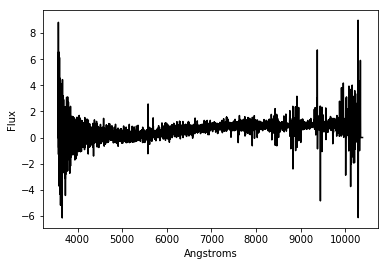

In [5]:
p.plot(wavelength, flux * (ivar > 0), 'k')
p.xlabel('Angstroms')
p.ylabel('Flux')

### List all available public file spaces

In [ ]:
sc.services()